# Notebook of Driver Drowsiness Detection

# Trained Model For Eyes

Trained Model for Eyes : 1452
feature :  1452
label :  1452
[0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1]
Accuracy:  1.0
Prediction is :  Closed
Actual result :  [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


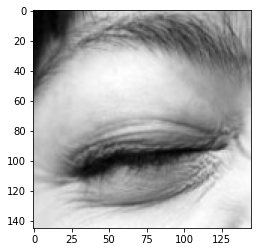

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

dir="D:\\SEM 6\\CIP\\driver drowsiness\\Notebook7\\archive\\train"

categories=['Closed','Open']

data=[]
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        human_img=cv2.imread(imgpath,0)
        try: 
            human_img=cv2.resize(human_img,(145,145))
            image=np.array(human_img).flatten()
            data.append([image,label]) 
        except Exception as e:
            pass
print("Trained Model for Eyes :",len(data))

pick_in=open('data.picle','wb')
pickle.dump(data,pick_in)
pick_in.close()           
random.shuffle(data)
features=[]
labels=[]
for feature,label in data:
    features.append(feature)
    labels.append(label)
    
print("feature : ",len(features))
print("label : ",len(labels))

xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.10)
# model=SVC(C=1,kernel='poly',gamma='auto')
# model.fit(xtrain,ytrain)
# pick=open('model.sav','wb')
# pickle.dump(model,pick)
# pick.close()
pick=open('model.sav','rb')
model=pickle.load(pick)
pick.close()
# print(xtest)
prediction=model.predict(xtest)
print(prediction)
accuracy=model.score(xtest,ytest)
categories=['Closed','Open']
print('Accuracy: ',accuracy)
print('Prediction is : ',categories[prediction[0]])
print('Actual result : ',ytest)
myhuman=xtest[0].reshape(145,145) 
plt.imshow(myhuman,cmap='gray')
plt.show()

# Confusion Matrix for Eyes

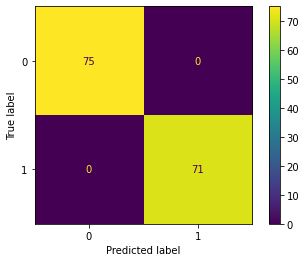

**************Confusion matrix for Eyes : ******************
TP:  71
TN:  75
FP:  0
FN:  0


In [2]:
plot_confusion_matrix(model, xtest, ytest)
plt.show()

i=0
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(prediction)): 
    if ytest[i]==prediction[i]==1:
       TP += 1
    if ytest[i]==1 and ytest[i]!=prediction[i]:
       FP += 1
    if ytest[i]==prediction[i]==0:
       TN += 1
    if ytest[i]==0 and ytest[i]!=prediction[i]:
       FN += 1
print('**************Confusion matrix for Eyes : ******************')
print('TP: ',TP)
print('TN: ',TN)
print('FP: ',FP)
print('FN: ',FN)

# Trained Model For Mouth

Trained Model for mouth : 2527
features :  2527
labels :  2527
[1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0]
Accuracy:  1.0
Prediction is :  yawn
Actual result :  [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,

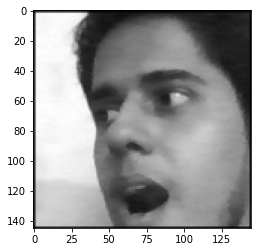

In [15]:
dir1 = r"D:\SEM 6\CIP\Face Detection\project\Face"
categories1=['no_yawn','yawn']

data1=[]
for category in categories1:
    path1=os.path.join(dir1,category)
    label1=categories1.index(category)
    for img in os.listdir(path1):
        imgpath1=os.path.join(path1,img)
        human_img1=cv2.imread(imgpath1,0)
        face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
        faces = face_cascade.detectMultiScale(human_img1, 1.3, 5)
        for (x, y, w, h) in faces:
            img = cv2.rectangle(human_img1, (x, y), (x+w, y+h), (0, 255, 0), 2)
            roi_color = img[y:y+h, x:x+w]
            try: 
                roi_color=cv2.resize(roi_color,(145,145))
                image1=np.array(roi_color).flatten()
                data1.append([image1,label1]) 
            except Exception as e:
                pass
print("Trained Model for mouth :",len(data1))

pick_in1=open('data2.picle','wb')
pickle.dump(data1,pick_in1)
pick_in.close()           
random.shuffle(data1)
features1=[]
labels1=[]
for feature,label in data1:
    features1.append(feature)
    labels1.append(label)
    
print("features : ",len(features1))
print("labels : ",len(labels1))

xtrain1,xtest1,ytrain1,ytest1=train_test_split(features1,labels1,test_size=0.10)
# model1=SVC(C=1,kernel='poly',gamma='auto')
# model1.fit(xtrain1,ytrain1)
# pick1=open('model3.sav','wb')
# pickle.dump(model1,pick1)
# pick1.close()
pick1=open('model3.sav','rb')
model1=pickle.load(pick1)
pick1.close()
# print(xtest)
prediction1=model1.predict(xtest1)
print(prediction1)
accuracy1=model1.score(xtest1,ytest1)
categories1=['no_yawn','yawn']
print('Accuracy: ',accuracy1)
print('Prediction is : ',categories1[prediction1[0]])
print('Actual result : ',ytest1)
myhuman1=xtest1[0].reshape(145,145)
plt.imshow(myhuman1,cmap='gray')
plt.show()

# Confusion Matrix for Mouth

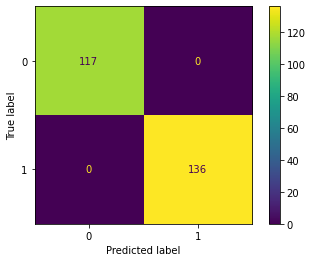

**************Confusion matrix for Mouth : ******************
TP:  136
TN:  117
FP:  0
FN:  0


In [16]:
plot_confusion_matrix(model1, xtest1, ytest1)
plt.show()

i=0
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(prediction1)): 
    if ytest1[i]==prediction1[i]==1:
       TP += 1
    if ytest1[i]==1 and ytest1[i]!=prediction1[i]:
       FP += 1
    if ytest1[i]==prediction1[i]==0:
       TN += 1
    if ytest1[i]==0 and ytest1[i]!=prediction1[i]:
       FN += 1
print('**************Confusion matrix for Mouth : ******************')
print('TP: ',TP)
print('TN: ',TN)
print('FP: ',FP)
print('FN: ',FN)

# Train and Test Dataset Size

In [7]:
print("xtrain for eyes : ",len(xtrain),"  xtrain for mouth : ",len(xtrain1))
print("ytrain for eyes : ",len(ytrain),"  ytrain for mouth : ",len(ytrain1))
print("xtest for eyes  : ",len(xtest) , "    xtest for mouth  : ",len(xtest1))
print("ytest for eyes  : ",len(ytest) , "    ytest for mouth  : ",len(ytest1))

xtrain for eyes :  1306   xtrain for mouth :  2274
ytrain for eyes :  1306   ytrain for mouth :  2274
xtest for eyes  :  146     xtest for mouth  :  253
ytest for eyes  :  146     ytest for mouth  :  253


# Code for Monitoring Face and Predicting the Actions

In [8]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time
import pickle

mixer.init()
sound = mixer.Sound("alarm.wav")
sound1 = mixer.Sound("beep.wav")

face = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
leye = cv2.CascadeClassifier("haarcascade_lefteye_2splits.xml")
reye = cv2.CascadeClassifier("haarcascade_righteye_2splits.xml")

lbl=['Closed','Open','yawn','no_yawn']

pick=open('model.sav','rb')
model=pickle.load(pick)
pick.close()

pick=open('model3.sav','rb')
model1=pickle.load(pick)
pick.close()

path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
score1=0
thicc=2
rpred=[99]
lpred=[99]
mpred=[99]
i=0

while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.3)
    left_eye = leye.detectMultiScale(gray)
    right_eye =  reye.detectMultiScale(gray)   

    cv2.rectangle(frame, (0,height-50) , (500,height) , (0,0,0) , thickness=cv2.FILLED )

    for (x,y,w,h) in faces:
        mo=frame[y:y+h,x:x+w]
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (255,0,0) , 1 )
        mo = cv2.cvtColor(mo,cv2.COLOR_BGR2GRAY)
        mo = cv2.resize(mo,(145,145))
        mo = np.array(mo).flatten()
        mo = np.expand_dims(mo,axis=0)
        mpred = model1.predict(mo)
        print("mouth : ",mpred[0])
        if(mpred[0]==1):
            lbl='yawn' 
        if(mpred[0]==0):
            lbl='no_yawn'
        break 

    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (0,255,0) , 1 )
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(145,145))
        r_eye = np.array(r_eye).flatten()
        r_eye = np.expand_dims(r_eye,axis=0)
        print(r_eye)
        rpred = model.predict(r_eye)
        if(rpred[0]==1):
            lbl='Open' 
        if(rpred[0]==0):
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (0,255,0) , 1 )
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
        l_eye = cv2.resize(l_eye,(145,145))
        l_eye = np.array(l_eye).flatten()
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = model.predict(l_eye)
        if(lpred[0]==1):
            lbl='Open'   
        if(lpred[0]==0):
            lbl='Closed'
        break
      
    if(rpred[0]==0 and lpred[0]==0):
        score=score+1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    else:
        score=score-1
        cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
        
    if(mpred[0]==1):
        score1=score1+1
        cv2.putText(frame,"Yawning",(200,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    elif(mpred[0]==0):
        score1=0;
        cv2.putText(frame,"Not Yawning",(200,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
    
    
    
    if(score1<0):
        score1=0   
    cv2.putText(frame,'Score1:'+str(score1),(360,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
    if(score1>5):
        score1=score1%8
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path,'image1.jpg'),frame)
        try:
            sound1.play()
            
        except:  # isplaying = False
            pass
        
    if(score<0):
        score=0   
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
            sound.play()
            
        except:  # isplaying = False
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
mouth :  0
[[150 150 150 ...  66  67  67]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  74  70  70]]
mouth :  0
[[150 150 150 ...  56  56  56]]
mouth :  0
[[150 150 150 ...  54  55  55]]
mouth :  0
[[150 150 150 ...  59  59  59]]
mouth :  0
[[150 150 150 ...  56  56  56]]
mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ...  60  60  60]]
mouth :  0
[[150 150 150 ...  58  58  58]]
mouth :  0
[[150 150 150 ...  57  58  58]]
mouth :  0
[[150 150 150 ...  60  60  60]]
mouth :  0
[[150 150 150 ...  57  57  57]]
mouth :  0
[[150 150 150 ...  57  57  57]]
mouth :  0
[[150 150 150 ...  56  56  56]]
mouth :  0
[[150 150 150 ...  56  56  56]]
mouth :  0
[[150 150 150 ...  57  57  57]]
mouth :  0
[[150 150 150 ...  56  56  56]]
mouth :  0
[[150 150 150 ...  54  54  54]]
mouth :  0
[[150 150 150 ...  56  56  56]]
mouth :  0
[[150 150 150 ...

mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  61  50  50]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  53  64  86]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  65  64  64]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  97 115 121]]
mouth :  0
[[150 150 150 ...  86  86  86]]
mouth :  0
[[150 150 150 ...  86  86  86]]
mouth :  0
[[150 150 150 ...  64  65  65]]
mouth :  0
[[150 150 150 ...  89  89  89]]
mouth :  0
[[150 150 150 ...  89  89  89]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ... 108  98  81]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  62  62  62]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0


mouth :  0
[[150 150 150 ...  62  62  62]]
mouth :  0
[[150 150 150 ...  60  60  60]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  93  78  65]]
mouth :  0
[[150 150 150 ...  99  82  64]]
mouth :  0
[[150 150 150 ...  65  64  64]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  68  68  68]]
mouth :  1
[[150 150 150 ...  67  67  67]]
mouth :  1
[[150 150 150 ...  67  68  68]]
mouth :  1
[[150 150 150 ...  67  68  68]]
mouth :  0
[[150 150 150 ...  67  68  68]]
mouth :  0
[[150 150 150 ...  70  70  70]]
mouth :  1
[[150 150 150 ...  63  64  64]]
mouth :  1
[[150 150 150 ...  64  65  65]]
mouth :  1
[[150 150 150 ...  67  67  67]]
mouth :  1
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  69  69  69]]
mouth :  1
[[150 150 150 ...  69  69  69]]
mouth :  1
[[150 150 150 ...  64  64  64]]
mouth :  1
[[150 150 150 ...  66  66  66]]
mouth :  1
[[150 150 150 ...  65  65  65]]
mouth :  1


mouth :  0
[[150 150 150 ...  62  62  62]]
mouth :  0
[[150 150 150 ... 104  89  63]]
mouth :  0
[[150 150 150 ...  92  92  92]]
mouth :  0
[[150 150 150 ...  91  91  91]]
mouth :  0
[[150 150 150 ... 102  90  72]]
mouth :  0
[[150 150 150 ...  89  89  89]]
mouth :  0
[[150 150 150 ...  80  62  50]]
mouth :  0
[[150 150 150 ... 105 104 105]]
mouth :  0
[[150 150 150 ... 107 106 105]]
mouth :  0
[[150 150 150 ... 104  85  57]]
mouth :  0
[[150 150 150 ...  97  80  59]]
mouth :  0
[[150 150 150 ... 105  94  78]]
mouth :  0
[[150 150 150 ...  89  89  89]]
mouth :  0
[[150 150 150 ...  60  60  60]]
mouth :  0
[[150 150 150 ... 109 109 109]]
mouth :  0
[[150 150 150 ...  60  60  60]]
mouth :  0
[[150 150 150 ...  59  59  59]]
mouth :  0
[[150 150 150 ... 103 103 104]]
mouth :  0
[[150 150 150 ...  91  91  91]]
mouth :  0
[[150 150 150 ...  90  90  90]]
mouth :  0
[[150 150 150 ...  93  93  93]]
mouth :  0
[[150 150 150 ... 109 108 108]]
mouth :  0
[[150 150 150 ... 124 124 124]]
mouth :  0


mouth :  1
[[150 150 150 ...  86  86  86]]
mouth :  1
[[150 150 150 ...  89  90  90]]
mouth :  1
[[150 150 150 ...  59  59  59]]
mouth :  1
[[150 150 150 ...  88  88  88]]
mouth :  0
[[150 150 150 ...  84  84  84]]
mouth :  0
[[150 150 150 ...  89  89  89]]
mouth :  0
[[150 150 150 ...  83  83  83]]
mouth :  0
[[150 150 150 ...  85  86  86]]
mouth :  0
[[150 150 150 ...  88  88  88]]
mouth :  0
[[150 150 150 ...  85  85  85]]
mouth :  0
[[150 150 150 ...  88  88  88]]
mouth :  0
[[150 150 150 ...  85  85  85]]
mouth :  0
[[150 150 150 ...  86  86  86]]
mouth :  0
[[150 150 150 ...  73  73  73]]
mouth :  0
[[150 150 150 ...  67  68  68]]
mouth :  0
[[150 150 150 ... 123 123 123]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ... 122 122 122]]
mouth :  0
[[150 150 150 ... 123 123 123]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ... 122 122 122]]
mouth :  0
[[150 150 150 ... 122 123 123]]
mouth :  0


mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  68  68  68]]
mouth :  0
[[150 150 150 ...  69  69  69]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  67  68  68]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  68  68  68]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  65  66  66]]
mouth :  0


mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  67  68  68]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ... 126 126 126]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  64  65  65]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  67  68  68]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0


mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  66  67  67]]
mouth :  0
[[150 150 150 ...  68  68  68]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  69  69  69]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0


mouth :  0
[[150 150 150 ...  68  68  68]]
mouth :  0
[[150 150 150 ...  66  67  67]]
mouth :  0
[[150 150 150 ...  79  81  81]]
mouth :  0
[[150 150 150 ...  90  93  93]]
mouth :  0
[[150 150 150 ... 129 129 129]]
mouth :  0
[[150 150 150 ... 130 130 130]]
mouth :  0
[[150 150 150 ... 132 132 132]]
mouth :  0
[[150 150 150 ... 130 130 130]]
mouth :  1
[[150 150 150 ... 130 130 130]]
mouth :  0
[[150 150 150 ... 129 129 129]]
mouth :  0
[[150 150 150 ... 130 130 130]]
mouth :  1
[[150 150 150 ... 129 130 130]]
mouth :  1
[[150 150 150 ... 129 130 130]]
mouth :  0
[[150 150 150 ... 130 130 130]]
mouth :  1
[[150 150 150 ... 128 128 128]]
mouth :  0
[[150 150 150 ... 130 130 130]]
mouth :  0
[[150 150 150 ... 132 132 132]]
mouth :  0
[[150 150 150 ... 131 131 131]]
mouth :  0
[[150 150 150 ... 131 131 131]]
mouth :  0
[[150 154 154 ... 177 178 177]]
mouth :  1
[[150 150 150 ... 130 131 131]]
mouth :  1
[[150 150 150 ... 130 130 130]]
mouth :  0
[[150 150 150 ... 130 130 130]]
mouth :  0


mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  71  72  72]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  64  65  65]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  62  63  63]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  62  62  62]]
mouth :  0
[[150 150 150 ...  65  65  65]]
mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ...  62  63  63]]
mouth :  0
[[150 150 150 ...  63  64  64]]
mouth :  0
[[150 150 150 ...  62  62  62]]
mouth :  0


mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  59  59  59]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ... 123 123 123]]
mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ...  62  62  62]]
mouth :  0
[[150 150 150 ...  60  60  60]]
mouth :  0
[[150 150 150 ...  61  62  62]]
mouth :  0
[[150 150 150 ...  59  59  59]]
mouth :  0
[[150 150 150 ...  62  62  62]]
mouth :  0
[[150 150 150 ...  62  62  62]]
mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  61  62  62]]
mouth :  0
[[150 150 150 ...  61  62  62]]
mouth :  0
[[150 150 150 ...  63  63  63]]
mouth :  0
[[150 150 150 ...  62  62  62]]
mouth :  0
[[150 150 150 ... 124 124 124]]
mouth :  0
[[150 150 150 ...  61  61  61]]
mouth :  0


mouth :  0
[[150 150 150 ...  60  60  60]]
mouth :  0
[[150 150 150 ...  57  57  57]]
mouth :  0
[[150 150 150 ...  59  59  59]]
mouth :  0
[[150 150 150 ...  61  62  62]]
mouth :  0
[[150 150 150 ...  58  58  58]]
mouth :  0
[[150 150 150 ... 125 125 125]]
mouth :  0
[[150 150 150 ...  64  65  65]]
mouth :  0
[[150 150 150 ...  62  63  63]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
[[150 150 150 ...  67  67  67]]
mouth :  0
[[150 150 150 ...  71  73  73]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  70  71  71]]
mouth :  0
[[150 150 150 ...  64  65  65]]
mouth :  0
[[150 150 150 ...  64  65  65]]
mouth :  0
[[150 150 150 ...  70  71  71]]
mouth :  0
[[150 150 150 ...  66  66  66]]
mouth :  0
[[150 150 150 ...  68  69  69]]
mouth :  0
[[150 150 150 ...  94  94  94]]
mouth :  0
[[150 150 150 ...  67  69  69]]
mouth :  0
[[150 150 150 ...  74  76  76]]
mouth :  0
[[150 150 150 ...  71  72  72]]
mouth :  0
[[150 150 150 ...  64  64  64]]
mouth :  0
